# Comparing CA3 and CA1 Neuron Electrophysiology


## Team Member Names & Contributions
*Feel free to name your team, but please also include your real names and IDs here. Please specify who in your group worked on which parts of the project.*

- **Captain Marvel**: You know, blowing up things and such.
- **Ant Man**: Cleverly sneaking into small spaces
- **Lauren Hui**: Compiling data; abstract; background

## Abstract

*Fill in your 3-4 sentence abstract here*

## Research Question

How does the electrophysiology of CA3 neurons compare to that of CA1 neurons in the hippocampus?

* Is the firing rate similar?
* Is the spike half-width similar?
* Are waveform amplitude and spike amplitude comparable?

# Background and Prior Work

   The hippocampus is home to a host of important functions such as learning and memory, and its ability to serve these vital functions is dependent on its circuitry. The perforant pathway, which originates in the entorhinal cortex and terminates on granule cells in the dentate gyrus, is the major afferent pathway to the hippocampus. Fibers project from the entorhinal cortex to the CA3 region and the CA1 region. In Figure 5 (Doller et al. 1982), CA3 stimulation resulted in similar recordings in CA1 neurons, but the recordings differed compared to those from perforant pathway stimulation. This difference suggests that the origin of stimulation has an effect on activity of the CA1 region. Following activation of this circuit, depolarization of the CA3 neurons causes a smaller depolarization in the CA1 neuron as seen in Figure 6 (Ferrea et al. 2012). 
   
   Because of the complexity of CA3 projections to the CA1 cells, we would like to examine the differences and similarities in CA3 and CA1 electrophysiology. The CA3/CA1 hippocampal circuit was of interest to us because alterations to this pathway may have a profound effect on learning and memory. Examining the activity of CA3 and CA1 action potentials will help us gain a better understanding of how the circuit interacts with each segment. 
   
   For this project, we are using data sets from NeuroElectro and Neuropixels to compare electrophysiology data. NeuroElectro... Neuropixels


### References (include links):
(1) Doller, Herbert J., and Forrest F. Weight. “Perforant Pathway Activation of Hippocampal CA1 Stratum Pyramidale Neurons: Electrophysiological Evidence for a Direct Pathway.” Brain Research, Elsevier, 7 Mar. 2003.

(2) Ferrea, et al. “Large-Scale, High-Resolution Electrophysiological Imaging of Field 
Potentials in Brain Slices with Microelectronic Multielectrode Arrays.” Frontiers, Frontiers, 17 Oct. 2012.

## Hypothesis


*Fill in your hypotheses here*

## Setup
*Are there packages that need to be imported, or datasets that need to be downloaded?*

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Data Wrangling

Describe your data wrangling steps here.

In [17]:
#Import the NeuroElectro Data
df = pd.read_excel ('neurophysiology_data.xlsx')
mouse_df = pd.DataFrame (df)
mouse_df

#pull out all the rows where "CA3" is in the NeuroType column and create a new DataFrame 
df_CA3 = df[df['NeuronType'].str.contains('CA3')].reset_index(drop=True)
df_CA3

#did the same thing for CA1 cells 
df_CA1 = df[df['NeuronType'].str.contains('CA1')].reset_index(drop=True)
df_CA1

#get all the columns of df_CA3 with ephys we are interested in
print(df_CA3[['FiringFrequency','SpikeHalfWidth','SpikeAmplitude']])

#did the same thing for df_CA1
print(df_CA1[['FiringFrequency','SpikeHalfWidth','SpikeAmplitude']])

    FiringFrequency  SpikeHalfWidth  SpikeAmplitude
0               NaN            0.54             NaN
1               NaN            0.84             NaN
2               NaN            1.70            85.0
3               NaN            0.79             NaN
4               NaN            1.70            80.0
5             118.0             NaN            74.5
6               NaN            0.55            92.2
7               NaN            1.30            73.9
8               NaN            1.18             NaN
9               NaN             NaN             NaN
10              NaN            1.10            76.0
11              NaN            0.57             NaN
    FiringFrequency  SpikeHalfWidth  SpikeAmplitude
0               NaN            0.40             NaN
1               NaN             NaN             NaN
2               NaN             NaN             NaN
3               NaN            0.67             NaN
4             206.0             NaN             NaN
5           

In [18]:
# Import the Neuropixels Cache
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

# We have all of this data on the datahub! This is where it lives.
manifest_path = '/datasets/allen-brain-observatory/visual-coding-neuropixels/ecephys-cache/manifest.json' 

# Create the EcephysProjectCache object
cache = EcephysProjectCache.fixed(manifest=manifest_path)

# Get the sessions available in this dataset
sessions = cache.get_session_table()
session_ca1_list = []

for idx,structure_list in enumerate(sessions['ecephys_structure_acronyms']):
    if 'CA1' in structure_list:
        session_ca1_list.append(sessions.index[idx])   

session_ca3_list = []

for idx,structure_list in enumerate(sessions['ecephys_structure_acronyms']):
    if 'CA3' in structure_list:
        session_ca3_list.append(sessions.index[idx]) 
        
        
session = cache.get_session_data(session_ca3_list[0])
allen_ca3 = session.units[session.units.ecephys_structure_acronym=='CA3']
allen_ca3_amplitude = allen_ca3['waveform_amplitude']
allen_ca3_half_width = allen_ca3['waveform_halfwidth']
allen_ca3_firing_rate = allen_ca3['firing_rate']

session_a = cache.get_session_data(session_ca1_list[0])
allen_ca1 = session_a.units[session.units.ecephys_structure_acronym == 'CA1']
allen_ca1_amplitude = allen_ca1['waveform_amplitude']
allen_ca1_half_width = allen_ca1['waveform_halfwidth']
allen_ca1_firing_rate = allen_ca1['firing_rate']

print(allen_ca1_firing_rate)

unit_id
950911195     8.201781
950911223    15.087965
950911266    23.864839
950911286     2.396609
950912928     0.983724
               ...    
950954922     3.566261
950955053    16.898391
950955212     4.665299
950955361     3.913271
950955399    24.848122
Name: firing_rate, Length: 145, dtype: float64


## Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [16]:
# Create a session list for CA1 based on some criteria from Neuropixels

session_ca1_list = []

for idx,structure_list in enumerate(sessions['ecephys_structure_acronyms']):
    if 'CA1' in structure_list:
        session_ca1_list.append(sessions.index[idx])   
        
print('There are '+str(len(session_ca1_list))+' sessions that meet this criteria:')
print(session_ca1_list)

There are 52 sessions that meet this criteria:
[715093703, 719161530, 721123822, 743475441, 744228101, 746083955, 750332458, 750749662, 751348571, 754312389, 754829445, 755434585, 756029989, 757216464, 757970808, 758798717, 759883607, 760345702, 761418226, 762602078, 763673393, 766640955, 767871931, 768515987, 771160300, 771990200, 773418906, 774875821, 778240327, 778998620, 779839471, 781842082, 786091066, 787025148, 789848216, 791319847, 793224716, 794812542, 797828357, 798911424, 799864342, 816200189, 819186360, 819701982, 821695405, 829720705, 831882777, 835479236, 839068429, 839557629, 840012044, 847657808]


In [5]:
# Create a session list for CA3 based on criteria from Neuropixels

session_ca3_list = []

for idx,structure_list in enumerate(sessions['ecephys_structure_acronyms']):
    if 'CA3' in structure_list:
        session_ca3_list.append(sessions.index[idx])   
        
print('There are '+str(len(session_ca3_list))+' sessions that meet this criteria:')
print(session_ca3_list)

There are 50 sessions that meet this criteria:
[715093703, 719161530, 721123822, 743475441, 744228101, 746083955, 750332458, 750749662, 751348571, 754312389, 754829445, 755434585, 756029989, 757216464, 757970808, 759883607, 760345702, 761418226, 762602078, 763673393, 766640955, 767871931, 768515987, 771160300, 771990200, 773418906, 774875821, 778240327, 778998620, 779839471, 781842082, 786091066, 787025148, 789848216, 791319847, 793224716, 794812542, 797828357, 798911424, 799864342, 816200189, 819186360, 819701982, 821695405, 829720705, 835479236, 839068429, 839557629, 840012044, 847657808]


In [26]:
df_CA3[['FiringFrequency']].dropna()

,FiringFrequency
5,118.0


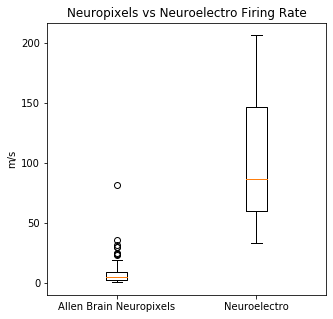

In [44]:
#FIRING RATE BOX PLOT FOR CA1
fig,ax = plt.subplots(figsize=(5,5))
data = [allen_ca1_firing_rate, df_CA1['FiringFrequency'].dropna()]
plt.boxplot(data)
ax.set_xticklabels(['Allen Brain Neuropixels','Neuroelectro'])
ax.set_ylabel('m/s')
ax.set_title('Neuropixels vs Neuroelectro Firing Rate')
plt.show()

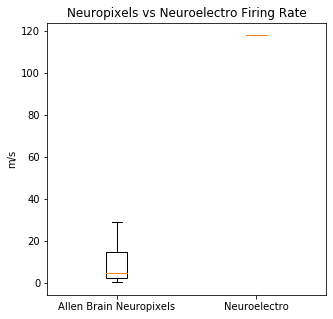

In [43]:
#FIRING RATE FOR CA3
fig,ax = plt.subplots(figsize=(5,5))
data = [allen_ca3_firing_rate, df_CA3['FiringFrequency'].dropna()]
plt.boxplot(data)
ax.set_xticklabels(['Allen Brain Neuropixels','Neuroelectro'])
ax.set_ylabel('m/s')
ax.set_title('Neuropixels vs Neuroelectro Firing Rate')
plt.show()

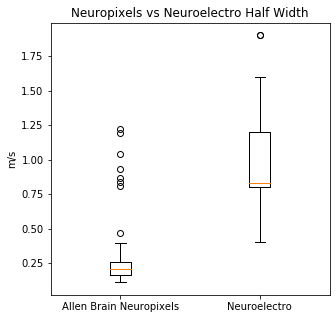

In [40]:
#SPIKE WIDTH BOX PLOT FOR CA1
fig,ax = plt.subplots(figsize=(5,5))
data = [allen_ca1_half_width, df_CA1['SpikeHalfWidth'].dropna()]
plt.boxplot(data)
ax.set_xticklabels(['Allen Brain Neuropixels','Neuroelectro'])
ax.set_ylabel('m/s')
ax.set_title('Neuropixels vs Neuroelectro Half Width')
plt.show()

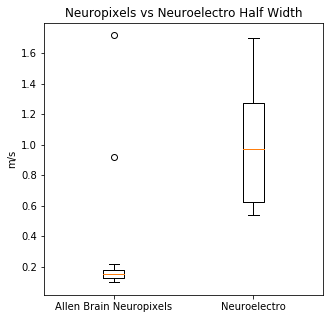

In [42]:
#BOXPLOT FOR SPIKE HALF WIDTH FOR CA3
fig,ax = plt.subplots(figsize=(5,5))
data = [allen_ca3_half_width.dropna(), df_CA3['SpikeHalfWidth'].dropna()]
plt.boxplot(data)
ax.set_xticklabels(['Allen Brain Neuropixels','Neuroelectro'])
ax.set_ylabel('m/s')
ax.set_title('Neuropixels vs Neuroelectro Half Width')
plt.show()

## Conclusion & Discussion

*Fill in your discussion information here*